<a href="https://colab.research.google.com/github/4nands/L20251022/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 101s 703ms/step - acc: 0.2028 - loss: 2.1163 - val_acc: 0.4190 - val_loss: 1.6132
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 102s 719ms/step - acc: 0.4312 - loss: 1.5767 - val_acc: 0.4990 - val_loss: 1.3930
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 99s 701ms/step - acc: 0.5015 - loss: 1.3779 - val_acc: 0.5570 - val_loss: 1.2731
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 98s 694ms/step - acc: 0.5610 - loss: 1.2179 - val_acc: 0.5935 - val_loss: 1.1598
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 102s 724ms/step - acc: 0.6071 - loss: 1.0805 - val_acc: 0.6100 - val_loss: 1.1228
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 140s 711ms/step - acc: 0.6342 - loss: 1.0226 - val_acc: 0.6545 - val_loss: 1.0256
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 100s 706ms/step - acc: 0.6722 - loss: 0.9186 - val_acc: 0.6590 - val_loss: 1.0010
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 142s 704ms/step - acc: 0.7003 - loss: 0.8326 - val_acc: 0.6690 - val_loss: 0.9610
Epoch 9/15
141/141 ━━━━━━━

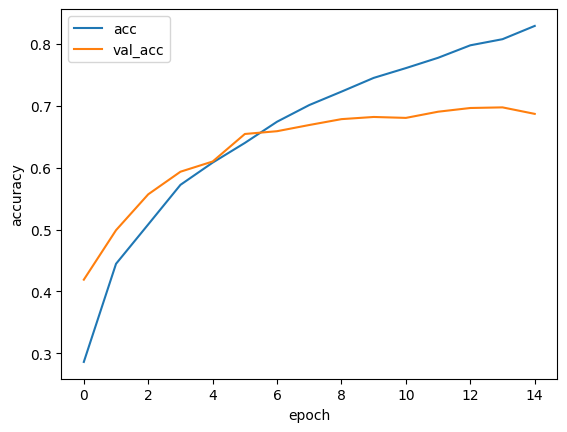

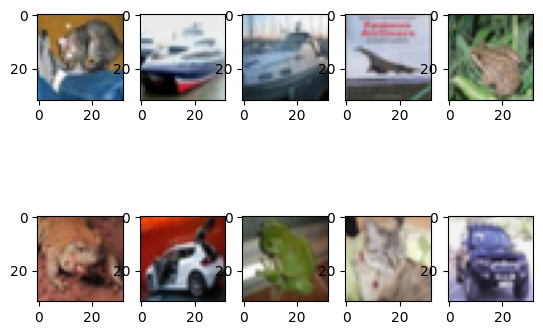

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
['cat', 'automobile', 'ship', 'airplane', 'cat', 'cat', 'automobile', 'deer', 'cat', 'automobile']


In [31]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPool2D
from keras import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()


train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['acc'])

train_images = train_images[:20000]
train_labels = train_labels[:20000]

history = model.fit(train_images,train_labels,batch_size=128,epochs=15,validation_split=0.1)


#model.save('convolution.h5')
#model = load_model('convolution.h5')

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(test_images[i])
plt.show()

test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions,axis=1)
labels =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
name = [labels[n] for n in test_predictions]
print(name)

